<a href="https://colab.research.google.com/github/ohallao/MoneyBall-Brasileirao/blob/main/MoneyBall_Brasileirao_Laterais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[12/31/24 18:48:20] INFO     No custom team name replacements found. You can configure these in       ]8;id=559364;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=224704;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#90\90]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=78220;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=446031;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_config.py#194\194]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[12/31/24 18:48:21] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=346600;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=295971;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                   Playing Time               \
                                                             MP Starts   Min   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio           20     14  1215   
                                  Alex Santana                4      0   101   
                                  Bento                       7      7   630   
                                  Bruno Praxedes              7      2   237   
                                  Bruno Zapelli              32     16  1412   

                                                         Performance      ...  \
                                                     90s         Gls Ast  ...   
league      season team           player                                  ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           4   1  ...   
                                  Alex Santana       1.1           0   0  ...   
                                  Bento              7.0           0   0  ...   
                                  Bruno Praxedes     2.6           0   0  ...   
                                  Bruno Zapelli     15.7           0   5  ...   

                                                   Per 90 Minutes              \
                                                              Gls   Ast   G+A   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            0.3  0.07  0.37   
                                  Alex Santana                0.0   0.0   0.0   
                                  Bento                       0.0   0.0   0.0   
                                  Bruno Praxedes              0.0   0.0   0.0   
                                  Bruno Zapelli               0.0  0.32  0.32   

                                                                            \
                                                   G-PK G+A-PK    xG   xAG   
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  0.3   0.37  0.26  0.18   
                                  Alex Santana      0.0    0.0  0.06   0.0   
                                  Bento             0.0    0.0   0.0   0.0   
                                  Bruno Praxedes    0.0    0.0  0.03  0.12   
                                  Bruno Zapelli     0.0   0.32  0.24   0.3   

                                                                          
                                                   xG+xAG  npxG npxG+xAG  
league      season team           player                                  
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   0.44  0.26     0.44  
                                  Alex Santana       0.06  0.06     0.06  
                                  Bento               0.0   0.0      0.0  
                                  Bruno Praxedes     0.15  0.03     0.15  
                                  Bruno Zapelli      0.54  0.24     0.54  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born Playing Time         ... Per 90 Minutes                                \
                  MP Starts  ...            Gls   Ast   G+A G-PK G+A-PK    xG   
0  1998           20     14  ...            0.3  0.07  0.37  0.3   0.37  0.26   
1  1995            4      0  ...            0.0   0.0   0.0  0.0    0.0  0.06   
2  1999            7      7  ...            0.0   0.0   0.0  0.0    0.0   0.0   
3  2002            7      2  ...            0.0   0.0   0.0  0.0    0.0  0.03   
4  2002           32     16  ...            0.0  0.32  0.32  0.0   0.32  0.24   

                               
    xAG xG+xAG  npxG npxG+xAG  
0  0.18   0.44  0.26     0.44  
1   0.0   0.06  0.06     0.06  
2   0.0    0.0   0.0      0.0  
3  0.12   0.15  0.03     0.15  
4   0.3   0.54  0.24     0.54  

[5 rows x 37 columns]

In [8]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Performance       \
                                                                CrdY CrdR   
league      season team           player                                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5           6    1   
                                  Alex Santana       1.1           2    0   
                                  Bento              7.0           1    0   
                                  Bruno Praxedes     2.6           0    0   
                                  Bruno Zapelli     15.7           3    0   

                                                                  ...          \
                                                   2CrdY Fls Fld  ... Crs Int   
league      season team           player                          ...           
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     1  17  25  ...  36   4   
                                  Alex Santana         0   3   1  ...   0   0   
                                  Bento                0   1   0  ...   0   0   
                                  Bruno Praxedes       0   8   2  ...   7   2   
                                  Bruno Zapelli        0  19  18  ...  93   8   

                                                                              \
                                                   TklW PKwon PKcon OG Recov   
league      season team           player                                       
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   19     0     0  0    71   
                                  Alex Santana        0     0     0  0     6   
                                  Bento               0     0     1  0     4   
                                  Bruno Praxedes      4     0     0  0    13   
                                  Bruno Zapelli      19     0     0  0    70   

                                                   Aerial Duels              
                                                            Won Lost   Won%  
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio            7    7   50.0  
                                  Alex Santana                2    4   33.3  
                                  Bento                       2    0  100.0  
                                  Bruno Praxedes              3    2   60.0  
                                  Bruno Zapelli               4   17   19.0  

[5 rows x 21 columns]

In [9]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Performance  ...                                   Aerial Duels  \
                     CrdY  ... Crs Int TklW PKwon PKcon OG Recov          Won   
0  1998  13.5           6  ...  36   4   19     0     0  0    71            7   
1  1995   1.1           2  ...   0   0    0     0     0  0     6            2   
2  1999   7.0           1  ...   0   0    0     0     1  0     4            2   
3  2002   2.6           0  ...   7   2    4     0     0  0    13            3   
4  2002  15.7           3  ...  93   8   19     0     0  0    70            4   

               
  Lost   Won%  
0    7   50.0  
1    4   33.3  
2    0  100.0  
3    2   60.0  
4   17   19.0  

[5 rows x 25 columns]

In [10]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/fbref.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(dfs)
/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


nation    pos age  born  \
                                                                             
league      season team           player                                     
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio    URU  FW,MF  25  1998   
                                  Alex Santana        BRA  MF,FW  28  1995   
                                  Bento               BRA     GK  24  1999   
                                  Bruno Praxedes      BRA  MF,FW  21  2002   
                                  Bruno Zapelli       ARG  MF,FW  21  2002   

                                                     90s Tackles               \
                                                             Tkl TklW Def 3rd   
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio  13.5      30   19       6   
                                  Alex Santana       1.1       2    0       0   
                                  Bento              7.0       0    0       0   
                                  Bruno Praxedes     2.6       7    4       2   
                                  Bruno Zapelli     15.7      30   19       8   

                                                                    ...  \
                                                   Mid 3rd Att 3rd  ...   
league      season team           player                            ...   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio      20       4  ...   
                                  Alex Santana           1       1  ...   
                                  Bento                  0       0  ...   
                                  Bruno Praxedes         4       1  ...   
                                  Bruno Zapelli         12      10  ...   

                                                   Challenges             \
                                                          Att  Tkl% Lost   
league      season team           player                                   
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio         31  41.9   18   
                                  Alex Santana              5  20.0    4   
                                  Bento                     1   0.0    1   
                                  Bruno Praxedes            5  40.0    3   
                                  Bruno Zapelli            35  37.1   22   

                                                   Blocks         Int Tkl+Int  \
                                                   Blocks Sh Pass               
league      season team           player                                        
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio     22  0   22   4      34   
                                  Alex Santana          1  0    1   0       2   
                                  Bento                 0  0    0   0       0   
                                  Bruno Praxedes        7  3    4   2       9   
                                  Bruno Zapelli        16  3   13   8      38   

                                                   Clr Err  
                                                            
league      season team           player                    
BRA-Serie A 2425   Ath Paranaense Agustín Canobbio   8   0  
                                  Alex Santana       0   0  
                                  Bento              1   0  
                                  Bruno Praxedes     3   0  
                                  Bruno Zapelli     12   0  

[5 rows x 21 columns]

In [11]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season            team            player nation    pos age  \
                                                                            
0  BRA-Serie A   2425  Ath Paranaense  Agustín Canobbio    URU  FW,MF  25   
1  BRA-Serie A   2425  Ath Paranaense      Alex Santana    BRA  MF,FW  28   
2  BRA-Serie A   2425  Ath Paranaense             Bento    BRA     GK  24   
3  BRA-Serie A   2425  Ath Paranaense    Bruno Praxedes    BRA  MF,FW  21   
4  BRA-Serie A   2425  Ath Paranaense     Bruno Zapelli    ARG  MF,FW  21   

   born   90s Tackles  ... Challenges            Blocks         Int Tkl+Int  \
                  Tkl  ...        Att  Tkl% Lost Blocks Sh Pass               
0  1998  13.5      30  ...         31  41.9   18     22  0   22   4      34   
1  1995   1.1       2  ...          5  20.0    4      1  0    1   0       2   
2  1999   7.0       0  ...          1   0.0    1      0  0    0   0       0   
3  2002   2.6       7  ...          5  40.0    3      7  3    4   2       9   
4  2002  15.7      30  ...         35  37.1   22     16  3   13   8      38   

  Clr Err  
           
0   8   0  
1   0   0  
2   1   0  
3   3   0  
4  12   0  

[5 rows x 25 columns]

In [12]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [13]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP','Expected_xAG',]
]
df_misc_selected = player_season_misc[
    ['player_', 'team_', 'Aerial Duels_Won%', 'Aerial Duels_Won', 'Aerial Duels_Lost','Performance_Fls','Performance_CrdY','Performance_CrdR','Performance_2CrdY','Performance_Crs',]
]
df_def_selected = player_season_def[
    ['player_', 'team_','Challenges_Tkl', 'Challenges_Att','Challenges_Tkl%','Int_', 'Err_']
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged = pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')

# 5. Exibir o resultado
print(df_merged.head())

            player_           team_   pos_  age_  Playing Time_Min  \
0  Agustín Canobbio  Ath Paranaense  FW,MF    25              1215   
1      Alex Santana  Ath Paranaense  MF,FW    28               101   
2             Bento  Ath Paranaense     GK    24               630   
3    Bruno Praxedes  Ath Paranaense  MF,FW    21               237   
4     Bruno Zapelli  Ath Paranaense  MF,FW    21              1412   

   Progression_PrgC  Progression_PrgP  Expected_xAG  Aerial Duels_Won%  \
0                47                57           2.5               50.0   
1                 1                 2           0.0               33.3   
2                 0                 0           0.0              100.0   
3                 5                12           0.3               60.0   
4                37                82           4.7               19.0   

   Aerial Duels_Won  ...  Performance_Fls  Performance_CrdY  Performance_CrdR  \
0                 7  ...               17            

In [14]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Meias (MF), Atacantes(FW)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|MF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem
print(filtered_data.head())


           player_           team_ pos_  age_  Playing Time_Min  \
9         Fernando  Ath Paranaense   DF    24               724   
16    Kaique Rocha  Ath Paranaense   DF    22              2486   
18  Leonardo Godoy  Ath Paranaense   DF    28              1639   
20    Lucas Belezi  Ath Paranaense   DF    20               793   
22  Lucas Esquivel  Ath Paranaense   DF    22              2720   

    Progression_PrgC  Progression_PrgP  Expected_xAG  Aerial Duels_Won%  \
9                 14                36           0.5               60.0   
16                11                84           1.3               76.3   
18                16                61           1.0               39.4   
20                 3                15           0.1               68.8   
22                57               178           4.5               69.8   

    Aerial Duels_Won  ...  Performance_Fls  Performance_CrdY  \
9                 15  ...               13                 4   
16                

In [18]:
# Selecionar as colunas desejadas para análise
Lat = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Expected_xAG'),
    ('Aerial Duels_Won%'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Performance_Fls'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Crs'),
    ('Challenges_Tkl'),
    ('Challenges_Att'),
    ('Challenges_Tkl%'),
    ('Int_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Lat.columns = ['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros']

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Lat.head())


# Criar a nova coluna 'Aerial Duels ' no formato "50% (10/10)"
Lat['Aerial Duels '] = (
    Lat['Aerial Duel%'].astype(str) + '% (' +
    Lat['Aerial Duel Won'].astype(str) + '/' +
    Lat['Aerial Duel Lost'].astype(str) + ')')
# Remover jogadores com todas as métricas iguais a 0
Lat = Lat[(Lat[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]
# Exibir as primeiras linhas para conferir
Lat.head


           jogador            time posicao  idade  Minutos  Prgc  PrgP  xAG  \
9         Fernando  Ath Paranaense      DF     24      724    14    36  0.5   
16    Kaique Rocha  Ath Paranaense      DF     22     2486    11    84  1.3   
18  Leonardo Godoy  Ath Paranaense      DF     28     1639    16    61  1.0   
20    Lucas Belezi  Ath Paranaense      DF     20      793     3    15  0.1   
22  Lucas Esquivel  Ath Paranaense      DF     22     2720    57   178  4.5   

    Aerial Duel%  Aerial Duel Won  ...  Fouls  Yellow Card  Red Card  \
9           60.0               15  ...     13            4         0   
16          76.3               74  ...     19            3         0   
18          39.4               13  ...     32            5         0   
20          68.8               22  ...      6            2         0   
22          69.8               37  ...     32            5         1   

    2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  \
9               0  

<bound method NDFrame.head of             jogador            time posicao  idade  Minutos  Prgc  PrgP  xAG  \
9          Fernando  Ath Paranaense      DF     24      724    14    36  0.5   
16     Kaique Rocha  Ath Paranaense      DF     22     2486    11    84  1.3   
18   Leonardo Godoy  Ath Paranaense      DF     28     1639    16    61  1.0   
20     Lucas Belezi  Ath Paranaense      DF     20      793     3    15  0.1   
22   Lucas Esquivel  Ath Paranaense      DF     22     2720    57   178  4.5   
..              ...             ...     ...    ...      ...   ...   ...  ...   
713   Lucas Esteves         Vitória      DF     23     2932    46   108  3.0   
722           Neris         Vitória      DF     31     1359     9    37  0.0   
726    Raúl Cáceres         Vitória      DF     32     1695    50    49  2.4   
730          Wagner         Vitória      DF     24     3156    23   103  0.4   
731    Willean Lepo         Vitória      DF     27     1789    52    78  1.5   

     Aerial Duel%  Aerial Duel Won  ...  Yellow Card  Red Card  2 Yellow Card  \
9            60.0               15  ...            4         0              0   
16           76.3               74  ...            3         0              0   
18           39.4               13  ...            5         0              0   
20           68.8               22  ...            2         0              0   
22           69.8               37  ...            5         1              1   
..            ...              ...  ...          ...       ...            ...   
713          60.9               56  ...           10         0              0   
722          60.3               35  ...            3         1              0   
726          50.0               19  ...            2         0              0   
730          54.8               85  ...            5         1              0   
731          50.0               36  ...            5         0              0   

     Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros  \
9       31                6               14       42.9             18      0   
16       5               26               40       65.0             37      2   
18      50                8               18       44.4             11      0   
20       2                7               10       70.0             13      0   
22     135               33               67       49.3             35      0   
..     ...              ...              ...        ...            ...    ...   
713    121               30               43       69.8             40      0   
722      1               12               19       63.2             11      0   
726     94               28               47       59.6             14      0   
730      4               19               28       67.9             50      1   
731     55               45               77       58.4             30      1   

     Aerial Duels   
9    60.0% (15/10)  
16   76.3% (74/23)  
18   39.4% (13/20)  
20   68.8% (22/10)  
22   69.8% (37/16)  
..             ...  
713  60.9% (56/36)  
722  60.3% (35/23)  
726  50.0% (19/19)  
730  54.8% (85/70)  
731  50.0% (36/36)  

[144 rows x 22 columns]>

### **1. Previsão da Performance de Jogadores (Regressão Linear, Ridge e Lasso) (Zagueiro)**

In [20]:
# Definir X (variáveis independentes) e y (variável dependente)
X = Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card','Cross','Desarmes Totais','Interceptacao','Erros']]
y = Lat['Desarmes Certos']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


# Treinar e avaliar o modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R² da Regressão Linear: {r2_linear:.2f}")

# Treinar e avaliar o modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Você pode ajustar o valor de alpha
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² da Regressão Ridge: {r2_ridge:.2f}")

# Treinar e avaliar o modelo de Lasso
lasso_model = Lasso(alpha=0.1)  # Você pode ajustar o valor de alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² da Regressão Lasso: {r2_lasso:.2f}")

R² da Regressão Linear: 0.86
R² da Regressão Ridge: 0.86
R² da Regressão Lasso: 0.86


In [21]:
# Verificar valores nulos nas variáveis independentes e dependentes
print(X.isnull().sum())
print(y.isnull().sum())

Prgc                0
PrgP                0
xAG                 0
Aerial Duel Won     0
Aerial Duel Lost    0
Fouls               0
Yellow Card         0
Red Card            0
Cross               0
Desarmes Totais     0
Interceptacao       0
Erros               0
dtype: int64
0


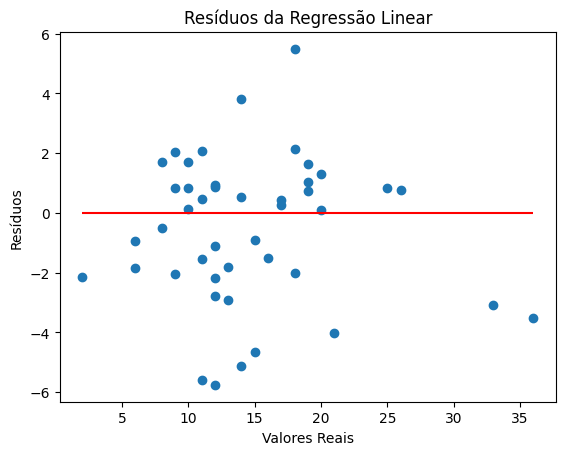

In [22]:
plt.scatter(y_test, y_test - y_pred_linear)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.title('Resíduos da Regressão Linear')
plt.show()


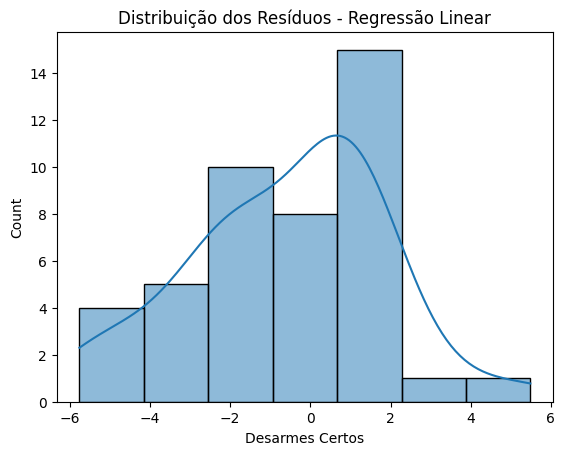

In [23]:
sns.histplot(y_test - y_pred_linear, kde=True)
plt.title('Distribuição dos Resíduos - Regressão Linear')
plt.show()

- O gráfico sugere que o modelo está razoavelmente ajustado, mas com uma leve assimetria negativa e alguns possíveis outliers à esquerda.

### **2. Criar modelos de classificação para  (ZAGUEIRO)**

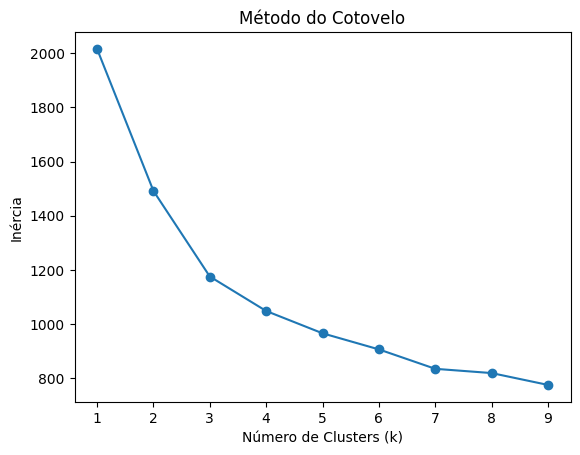

In [28]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [29]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Lat['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Lat[['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros']])

     Prgc  PrgP  xAG  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  \
9      14    36  0.5               15                10     13            4   
16     11    84  1.3               74                23     19            3   
18     16    61  1.0               13                20     32            5   
20      3    15  0.1               22                10      6            2   
22     57   178  4.5               37                16     32            5   
..    ...   ...  ...              ...               ...    ...          ...   
713    46   108  3.0               56                36     36           10   
722     9    37  0.0               35                23     17            3   
726    50    49  2.4               19                19     22            2   
730    23   103  0.4               85                70     16            5   
731    52    78  1.5               36                36     18            5   

     Red Card  2 Yellow Card  Cross  Desarmes Certo

In [30]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [31]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Lat.groupby('Cluster').agg({col: 'mean' for col in Lat.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos       Prgc        PrgP       xAG  \
Cluster                                                            
0        25.454545  2495.545455  56.909091  108.909091  2.445455   
1        27.636364  2356.818182  50.181818  126.636364  3.090909   
2        28.068966  2363.310345  13.551724   77.827586  0.513793   
3             27.5  1058.807692        8.0   36.692308  0.384615   
4        27.354839  1701.096774  37.709677    81.16129  1.477419   
5             26.6       1876.7       14.9        70.3      0.76   

         Aerial Duel%  Aerial Duel Won  Aerial Duel Lost      Fouls  \
Cluster                                                               
0           53.318182        33.727273         28.181818  35.636364   
1           46.354545        19.454545         20.909091  23.545455   
2           63.282759         66.37931         37.862069  24.448276   
3           57.594231        23.269231         15.576923  12.923077   
4           52.503226        

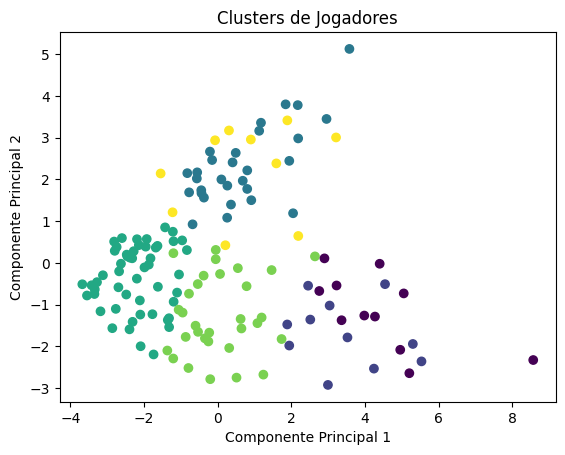

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


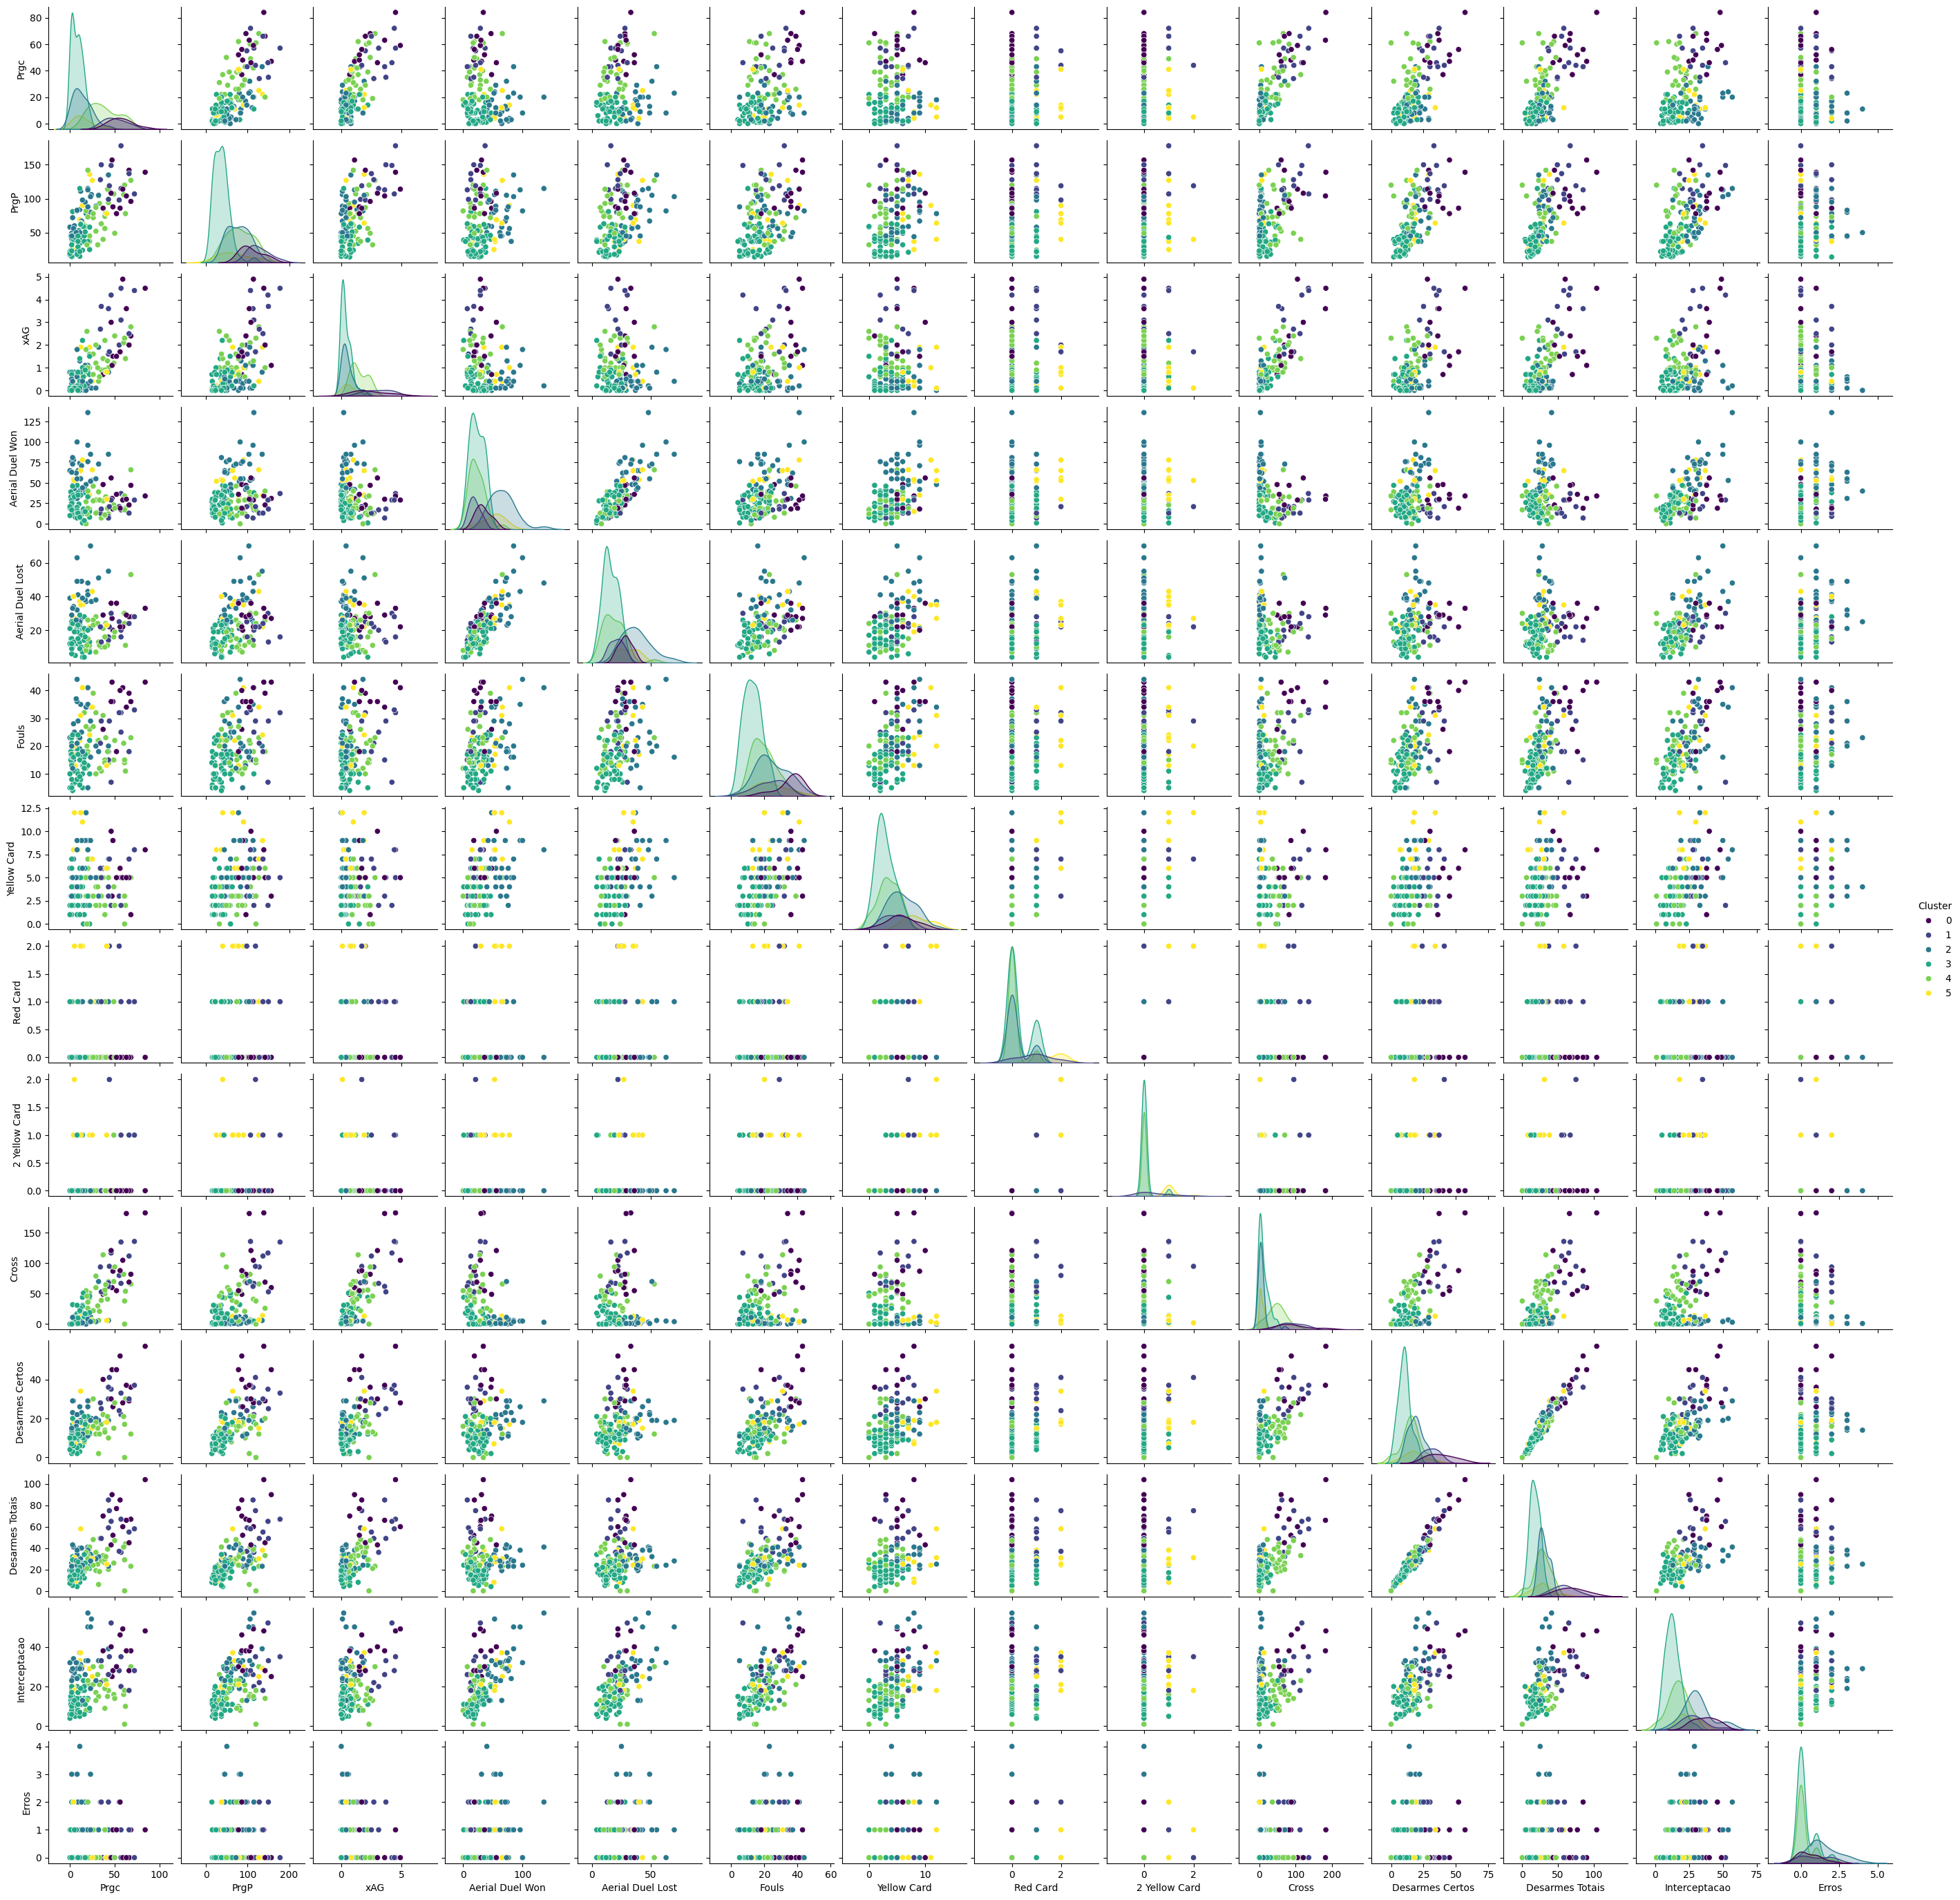

In [35]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc', 'PrgP','xAG','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Interceptacao','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Lat[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


# **Comportamento entre Variáveis (Foco em Laterais)**

## **1. Minutos vs. Cross**
- **Cluster 5 (Preto)**: Jogadores com alta participação em minutos e alto número de cruzamentos, laterais ofensivos que são fundamentais para apoiar o ataque e atuam como titulares consistentes.
- **Cluster 0 (Roxo)**: Menor participação em minutos e cruzamentos, indicando laterais reservas ou com menor envolvimento ofensivo.

## **2. Desarmes Certos vs. Passes Progressivos**
- **Cluster 4 (Amarelo)**: Alta eficiência defensiva e bons números de passes progressivos, destacando laterais equilibrados e versáteis.
- **Cluster 1 (Azul)**: Foco em desarmes com menos passes progressivos, laterais mais defensivos.

## **3. Interceptações vs. Faltas**
- **Cluster 5 (Preto)**: Alta média de interceptações e poucas faltas, indicando jogadores disciplinados e eficientes defensivamente.
- **Cluster 1 (Azul)**: Alta média de faltas, laterais mais físicos ou agressivos.

## **4. Aerial Duel Won% vs. Yellow Card**
- **Cluster 3 (Verde)**: Alta eficácia em duelos aéreos e poucos cartões amarelos, sugerindo laterais altos e disciplinados.
- **Cluster 0 (Roxo)**: Poucos duelos aéreos vencidos e alta média de cartões, possivelmente laterais de menor estatura ou mais agressivos.

---

# **Distribuição dos Clusters (Foco em Laterais)**

## **Cluster 0:**
- **Perfil**: Laterais ofensivos que contribuem significativamente no ataque, atuando como criadores de jogadas pelas laterais.
- **Destaques**:
  - **Cruzamentos (Cross)**: Média mais alta entre os clusters (98.27), indicando alta participação em jogadas ofensivas.
  - **Desarmes Certos (38.63)**: Alta média, mostrando equilíbrio entre funções ofensivas e defensivas.
  - **Minutos (2495.54)**: Alta média, sugerindo que são jogadores titulares frequentes.

## **Cluster 1:**
- **Perfil**: Laterais defensivos com foco em interceptações e desarmes, mas com participação limitada em jogadas ofensivas.
- **Destaques**:
  - **Interceptações (29.36)**: Valor significativo, mostrando boa leitura de jogo.
  - **Desarmes Certos (31.0)**: Valores moderados, indicando lateral defensivo consistente.
  - **Cruzamentos (92.63)**: Alta contribuição ofensiva, mas menor que o Cluster 0.

## **Cluster 2:**
- **Perfil**: Laterais defensivos intensos que dependem de desarmes e interceptações, mas com baixo envolvimento ofensivo.
- **Destaques**:
  - **Desarmes Totais (30.17)**: Moderado, com foco em ações defensivas.
  - **Faltas (24.44)**: Alta média, indicando jogadores mais agressivos no combate.
  - **Cruzamentos (6.17)**: Muito baixo, evidenciando pouca participação no ataque.

## **Cluster 3:**
- **Perfil**: Laterais híbridos, com características equilibradas entre defesa e ataque, mas não se destacam em nenhuma área específica.
- **Destaques**:
  - **Interceptações (31.30)**: Valor acima da média, destacando-se na leitura defensiva.
  - **Desarmes Totais (17.57)**: Moderados, com foco em situações de recuperação.
  - **Cruzamentos (10.80)**: Pouca contribuição ofensiva.

## **Cluster 4:**
- **Perfil**: Laterais defensivos técnicos e disciplinados, com maior foco em interceptações e posicionamento.
- **Destaques**:
  - **Interceptações (16.93)**: Menor entre os clusters, mas dentro de uma faixa moderada.
  - **Faltas (19.80)**: Valor reduzido, indicando boa disciplina defensiva.
  - **Cruzamentos (47.09)**: Moderada participação ofensiva.

## **Cluster 5:**
- **Perfil**: Laterais reservas ou com menor envolvimento geral em campo, utilizados de forma esporádica.
- **Destaques**:
  - **Minutos (1876.7)**: Menor média, indicando baixa participação em jogos.
  - **Interceptações (25.0)**: Valores baixos, mas consistentes.
  - **Cruzamentos (6.1)**: Pouco envolvimento em ações ofensivas.




In [37]:
cluster_names = {
    0: 'Laterais ofensivos',
    1: 'Laterais defensivos',
    2: 'Laterais fisicos',
    3: 'Laterais hibridos',
    4: 'Laterais tecnicos',
    5: 'Laterais reservas',
}

# Adicionar nomes ao DataFrame
Lat['Perfil'] = Lat['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Lat[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros','Perfil']].head())

           jogador            time posicao  idade  Minutos  Prgc  PrgP  xAG  \
9         Fernando  Ath Paranaense      DF     24      724    14    36  0.5   
16    Kaique Rocha  Ath Paranaense      DF     22     2486    11    84  1.3   
18  Leonardo Godoy  Ath Paranaense      DF     28     1639    16    61  1.0   
20    Lucas Belezi  Ath Paranaense      DF     20      793     3    15  0.1   
22  Lucas Esquivel  Ath Paranaense      DF     22     2720    57   178  4.5   

    Aerial Duel%  Aerial Duel Won  ...  Yellow Card  Red Card  2 Yellow Card  \
9           60.0               15  ...            4         0              0   
16          76.3               74  ...            3         0              0   
18          39.4               13  ...            5         0              0   
20          68.8               22  ...            2         0              0   
22          69.8               37  ...            5         1              1   

    Cross  Desarmes Certos  Desarmes Totais 

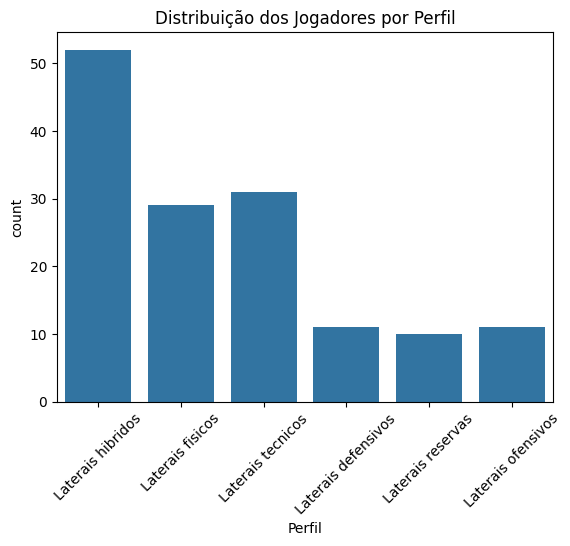

In [38]:
sns.countplot(data=Lat, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [40]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "Laterais ofensivos"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: Laterais ofensivos
                jogador              time posicao  idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
100       Renzo Saravia  Atlético Mineiro      DF     30     2291    47   157  1.1          53.4               31                27     43            3         0              0     60               45               90       50.0             25      0
288             William          Cruzeiro      DF     28     2963    84   139  4.5          50.7               34                33     43            8         0              0    183               57              104       54.8             48      1
317   Matheus Alexandre            Cuiabá      DF     24     2464    37    86  0.7          62.3               48                29     26            6         0              0     49               40      

In [42]:
# Dicionário dos peso para cada métrica
pesos = {
    'Prgc': 2,
    'PrgP': 2,
    'xAG' : 10,
    'Fouls': -3,
    'Yellow Card': -5,
    'Red Card': -10,
    'Cross': 10,
    'Desarmes Certos': 10,
    'Interceptacao' : 5,
    'Erros' : -2,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Lat[coluna + '_Pontuacao'] = Lat[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Lat['Pontuacao_Total'] = Lat[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Lat['Pontuacao_Total'].min()
max_pontuacao = Lat['Pontuacao_Total'].max()
Lat['Pontuacao'] = (
    (Lat['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'Laterais ofensivos'
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: Laterais ofensivos
 Ranking             time posicao            jogador             Perfil  Pontuacao
       1         Cruzeiro      DF            William Laterais ofensivos      100.0
       2    Vasco da Gama      DF        Lucas Piton Laterais ofensivos  88.407293
       3          Vitória      DF      Lucas Esteves Laterais ofensivos  63.192294
       4    Internacional      DF Alexandro Bernabei Laterais ofensivos  60.853113
       5    Vasco da Gama      DF     Paulo Henrique Laterais ofensivos  59.305126
       6         Flamengo      DF             Wesley Laterais ofensivos  53.457172
       7 Atlético Mineiro      DF      Renzo Saravia Laterais ofensivos  48.056416
       8       Fluminense      DF      Samuel Xavier Laterais ofensivos  46.818025
       9           Cuiabá      DF              Ramon Laterais ofensivos  46.405229
      10          Vitória      DF       Willean Lepo Laterais ofensivos  44.410045
      11           Cuiabá      DF  

In [44]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'Laterais ofensivos'  # Defina o perfil desejado
jogadores_filtrados = Lat[Lat['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'Laterais ofensivos': ['Renzo Saravia', 'William', 'Matheus Alexandre', 'Ramon', 'Wesley', 'Samuel Xavier', 'Alexandro Bernabei', 'Lucas Piton', 'Paulo Henrique', 'Lucas Esteves', 'Willean Lepo']
Digite o nome do jogador (ou 'sair' para finalizar): William
Insira o valor de mercado para William (€M): 5
Digite o nome do jogador (ou 'sair' para finalizar): Alexandro Bernabei
Insira o valor de mercado para Alexandro Bernabei (€M): 6
Digite o nome do jogador (ou 'sair' para finalizar): Lucas Esteves
Insira o valor de mercado para Lucas Esteves (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): Renzo Saravia
Insira o valor de mercado para Renzo Saravia (€M): 2
Digite o nome do jogador (ou 'sair' para finalizar): Paulo Henrique
Insira o valor de mercado para Paulo Henrique (€M): 1.7
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking            jogador  Valor de Mercado (€M)  Pontuacao  Cu


Jogadores selecionados: Santiago Arias, William, Alexandro Bernabei, Lucas Esteves
                jogador           time posicao  idade  Minutos  Prgc  PrgP  xAG  Aerial Duel%  Aerial Duel Won  Aerial Duel Lost  Fouls  Yellow Card  Red Card  2 Yellow Card  Cross  Desarmes Certos  Desarmes Totais  Desarmes%  Interceptacao  Erros
131      Santiago Arias          Bahia      DF     32     1884    57   115  3.1          45.9               17                20     25            2         1              0     67               22               36       61.1             20      1
288             William       Cruzeiro      DF     28     2963    84   139  4.5          50.7               34                33     43            8         0              0    183               57              104       54.8             48      1
474  Alexandro Bernabei  Internacional      DF     23     2063    59   114  4.9          56.9               29                22     41            5         0              

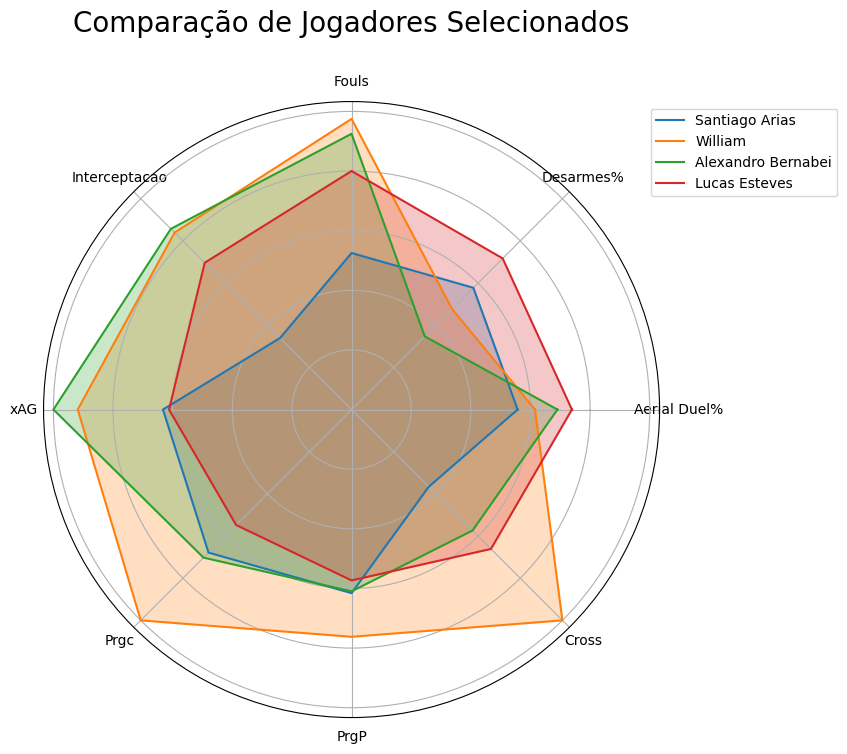

In [46]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc', 'PrgP','xAG','Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls', 'Yellow Card', 'Red Card', '2 Yellow Card','Cross','Desarmes Certos','Desarmes Totais','Desarmes%','Interceptacao','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['Aerial Duel%', 'Desarmes%', 'Fouls', 'Interceptacao','xAG','Prgc', 'PrgP','Cross',]
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Lucas Esteves', 'Santiago Arias','William','Alexandro Bernabei']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Lat)